In [110]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [113]:
dic = pkl.load( open ('/users/global/cornkle/C_paper/wavelet/saves/bulk_40big.p', 'rb')) #MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [114]:
_p=np.array(dic['pmax']) # 98th perc per MCS
_t=np.array(dic['tmin'])  #mean T
_clat = np.array(dic['clat'])
_area = np.array(dic['area'])*25
_isfin = np.array(dic['isfin'])
_isnz = np.array(dic['isnz'])
_po30 = np.array(dic['po30'])
_perc = np.array(dic['pperc'])
print('Number MCSs:', _p.size)

Number MCSs: 10447


In [115]:
pthresh = 200
pthresh2 = 0.1
athresh = 1500000
p = _p[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
t = _t[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
area = _area[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
po30 = _po30[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
isfin = _isfin[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]
isnz = _isnz[(_p<=pthresh)&(_area<=athresh)&(_p>=pthresh2)]

In [116]:
print(np.sum(po30))
print(np.percentile(_perc, 99))
print(area.min(), area.max())
print(p.min(), p.max())
print('Number MCSs:', p.size)

34873
32.9973852813
300 1007350
0.101519426447 196.368928987
Number MCSs: 10447


In [119]:
probs=[]
nb = []
cnt = []
cnt_nz = []
#aabins=np.array([100,2500,5000,10000,20000, 30000,50000, 75000,100000,150000,200000,300000,400000,500000])
aabins=np.array([300, 1000,2500,5000,8000,10000,15000,25000,50000,100000,250000,500000])
#aabins=np.percentile(area, np.arange(0,101, 10))
print(aabins/100)
aacenter = (aabins[:-1] + aabins[1:]) / 2
for binn in aabins:       
        prob = np.sum(po30[(area>=binn)])
        nbb = np.sum(area>=binn)
        ccnt = np.sum(isfin[(area>=binn)])
        ccnt_nz = np.sum(isnz[(area>=binn)])
        probs.append(prob)
        nb.append(nbb)
        cnt.append(ccnt)
        cnt_nz.append(ccnt_nz)


[  3.00000000e+00   1.00000000e+01   2.50000000e+01   5.00000000e+01
   8.00000000e+01   1.00000000e+02   1.50000000e+02   2.50000000e+02
   5.00000000e+02   1.00000000e+03   2.50000000e+03   5.00000000e+03]


In [120]:
np.arange(0,101, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [131]:
sysprob=[]  
sysarea=[]
sysarea_nz=[]
nb_pbin=[]
stddev = []
prob_minmax = po30/isfin
awidth = (aabins[1:] - aabins[:-1])
for ids, binn in enumerate(aabins):
    if ids == 0:
        continue
    ysprob = np.sum(po30[(area<binn)&(area>=aabins[ids-1])])
    ysarea = np.sum(isfin[(area<binn)&(area>=aabins[ids-1])])
    ysarea_nz = np.sum(isnz[(area<binn)&(area>=aabins[ids-1])])
    ysmin = np.std(prob_minmax[(area<binn)&(area>=aabins[ids-1])])
    nb_ppbin = area[(area<binn)&(area>=aabins[ids-1])].size
    sysprob.append(ysprob)
    sysarea.append(ysarea)
    sysarea_nz.append(ysarea_nz)
    stddev.append(ysmin)
    nb_pbin.append(nb_ppbin)

In [132]:
pprobs = np.array(probs) / np.sum(po30) * 100 # portion of included >30 pixel
nnb = np.array(nb) / len(area) * 100 # portion of systems that size vs all system count
cntt = np.array(probs)/np.array(cnt) # probability of pixel nb > 30 given all pixels in systems
cntt_nz = np.array(probs)/np.array(cnt_nz) # probability of pixel nb > 30 given >0 pixels in systems
ssys = np.array(sysprob)/np.array(sysarea)*100
ssys_nz = np.array(sysprob)/np.array(sysarea_nz)*100
np.sum(po30[area>25000])

30454

In [133]:
len(sysarea)

11

In [134]:
print(np.array(sysprob))
print(np.array(sysarea))
print(nb_pbin)

[  208   338   514   558   364   866  1563  3531  6283 11845  7099]
[  47693   92378  135875  141282   86025  195979  361347  707629 1091031
 1994459 1214107]
[1850, 1604, 1187, 750, 347, 623, 779, 972, 886, 989, 383]


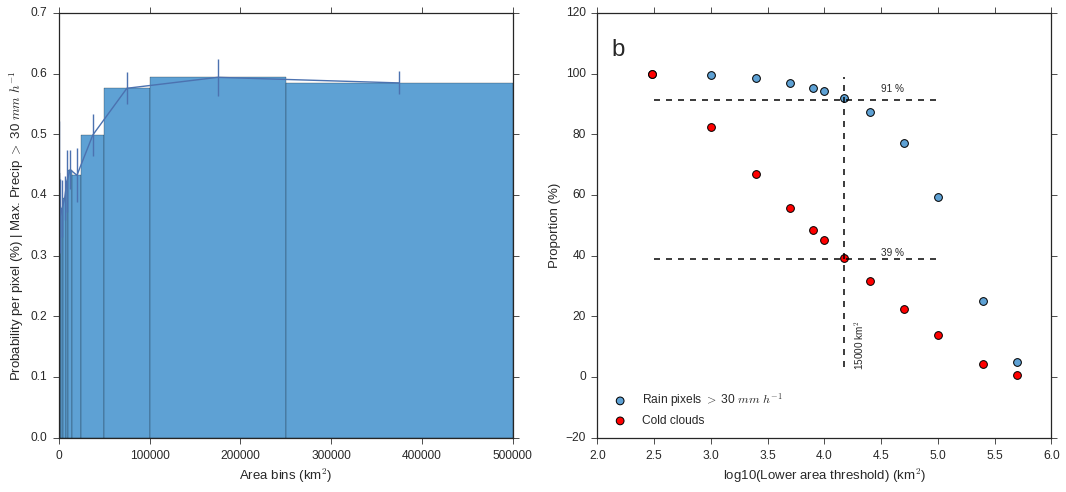

In [136]:
path = '/users/global/cornkle/C_paper/wavelet/figs/'
fig = plt.figure(figsize=(15, 7), dpi=400)
cc=0.8

######################

ax1 = fig.add_subplot(121)
ax1.errorbar(aacenter,ssys, yerr=np.array(stddev)*3)
ax1.bar(aabins[0:-1], ssys, width=awidth, color='#5ea1d4')

ax1.set_xlabel('Area bins (km$^2$) ')
ax1.set_ylabel('Probability per pixel (%) | Max. Precip $>$ 30 $mm\ h^{-1}$') 

###################

ax1 = fig.add_subplot(122)

ax1.scatter(np.log10(aabins), pprobs, marker="o",color='#5ea1d4', s=60, zorder=2, edgecolor = 'black', linewidth=1, label='Rain pixels $>$ 30 $mm\ h^{-1}$')
ax1.set_xlabel('log10(Lower area threshold) (km$^2$)')
ax1.set_ylabel('Proportion (%)') 

ax1.scatter(np.log10(aabins), nnb, marker="o",color='red', s=60, zorder=2, edgecolor = 'black', linewidth=1, label='Cold clouds') 
text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=24)
ax1.vlines(np.log10(15000), 3.5, 99, linestyles='dashed',  linewidth=1.5, color='black')
ax1.hlines(39, 2.5, 5, linestyles='dashed',  linewidth=1.5, color='black')
ax1.hlines(91.4,2.5, 5, linestyles='dashed',  linewidth=1.5, color='black')
text(4.5, 40, '39 %', fontsize=10)
text(4.5, 94, '91 %', fontsize=10)
text(4.25, 15, '15000 km$^2$', fontsize=10, rotation=90)
ax1.legend(loc='lower left')


plt.tight_layout()
plt.savefig(path+'area-40.png')

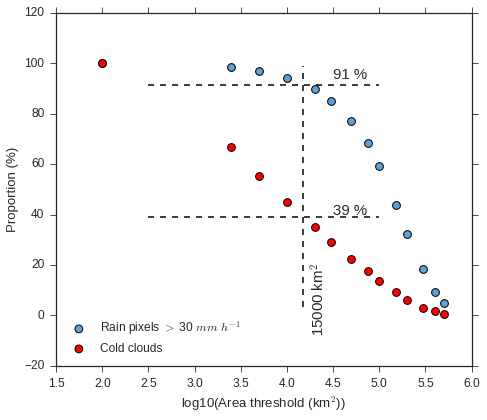

In [90]:
path = '/users/global/cornkle/C_paper/wavelet/figs/'
fig = plt.figure(figsize=(7, 6), dpi=400)
cc=0.8


###################

ax1 = fig.add_subplot(111)

ax1.scatter(np.log10(abins), pprobs, marker="o",color='#5ea1d4', s=60, zorder=2, edgecolor = 'black', linewidth=1, label='Rain pixels $>$ 30 $mm\ h^{-1}$')
ax1.set_xlabel('log10(Area threshold (km$^2$))')
ax1.set_ylabel('Proportion (%)') 

#ax1.set_xticklabels(abins)
#ax2 = ax1.twinx()
ax1.scatter(np.log10(abins), nnb, marker="o",color='red', s=60, zorder=2, edgecolor = 'black', linewidth=1, label='Cold clouds')
#ax2.set_ylabel('Included nb of cold clouds $>$ 30 $mm\ h^{-1}$ (%)') 
#text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=24)
ax1.vlines(np.log10(15000), 3.5, 99, linestyles='dashed',  linewidth=1.5, color='black')
ax1.hlines(39, 2.5, 5, linestyles='dashed',  linewidth=1.5, color='black')
ax1.hlines(91.4,2.5, 5, linestyles='dashed',  linewidth=1.5, color='black')
text(4.5, 40, '39 %', fontsize=15)
text(4.5, 94, '91 %', fontsize=15)
text(4.25, 15, '15000 km$^2$', fontsize=15, rotation=90)
ax1.legend(loc='lower left')


plt.tight_layout()
plt.savefig(path+'area-40_1.png')
plt.savefig(path+'area-40_1.eps')

In [14]:
print(aabins)

[   100   2500   5000  10000  20000  30000  50000  75000 100000 150000
 200000 300000 400000 500000]


In [15]:
np.sqrt(100000)

316.22776601683796

In [16]:
print(np.sum(isfin[(area>=25000)&(area>=50000)])/25)
print(np.sum(isfin[(area<5000)])/25)
print(np.sum(area>=15000))

186833.28
11044.64
4086


In [17]:
print('Percentages >30', list(zip(abins, pprobs)))

Percentages >30 [(100, 100.0), (500, 99.89963582140912), (1000, 99.403550024374155), (2500, 98.434318813982173), (5000, 96.960399162675998), (8000, 95.360307401141284), (10000, 94.316519943796067), (15000, 91.833223410661546), (25000, 87.351245949588503), (50000, 77.225934103747889), (100000, 59.209130272703817), (250000, 25.243024689587934), (500000, 4.8863017233963237)]


In [18]:
print('Nb systems', list(zip(abins, nb)))

Nb systems [(100, 10461), (500, 9917), (1000, 8597), (2500, 6993), (5000, 5806), (8000, 5056), (10000, 4709), (15000, 4086), (25000, 3307), (50000, 2335), (100000, 1449), (250000, 460), (500000, 77)]


In [19]:
print('Percentages nb systems', list(zip(abins, nnb)))

Percentages nb systems [(100, 100.0), (500, 94.799732339164507), (1000, 82.18143580919606), (2500, 66.848293662173788), (5000, 55.501386100755191), (8000, 48.331899436000384), (10000, 45.014816939107163), (15000, 39.059363349584167), (25000, 31.612656533792183), (50000, 22.321001816269955), (100000, 13.851448236306279), (250000, 4.3972851543829456), (500000, 0.73606729758149314)]


In [ ]:
"Only 670 > 25000 left?! -> 940 systems (42% of ) > 10000 deliver 96% of heavy rain"